<a href="https://colab.research.google.com/github/swon95/ML_Body-signal-of-smoking/blob/main/Body_signal_of_smoking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터셋 불러오기

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [41]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/kaggle_data/smoking.csv')
df

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55687,55676,F,40,170,65,75.0,0.9,0.9,1.0,1.0,...,12.3,1.0,0.6,14.0,7.0,10.0,Y,1,Y,0
55688,55681,F,45,160,50,70.0,1.2,1.2,1.0,1.0,...,14.0,1.0,0.9,20.0,12.0,14.0,Y,0,Y,0
55689,55683,F,55,160,50,68.5,1.0,1.2,1.0,1.0,...,12.4,1.0,0.5,17.0,11.0,12.0,Y,0,N,0
55690,55684,M,60,165,60,78.0,0.8,1.0,1.0,1.0,...,14.4,1.0,0.7,20.0,19.0,18.0,Y,0,N,0


## 데이터셋 설명
Kaggle Data Set


---

https://www.kaggle.com/datasets/kukuroo3/body-signal-of-smoking

건강 생체 신호 데이터셋을 기반으로, 흡연 여부를 예측하는 모델

- ID : index
- gender (M, F)
- age - 5년 단위
- height(cm) - 키
- weight(kg) - 체중
- waist(cm) - 허리둘레길이
- eyesight(left) - 시력(왼쪽)
- eyesight(right) - 시력(오른쪽)
- hearing(left) - 청력(왼쪽)
- hearing(right) - 청력(오른쪽)
- systolic - 수축계 혈압
- relaxation - 이완계 혈압
- fasting blood sugar - 공복 혈당
- Cholesterol - 총 콜레스테롤수치
- triglyceride - 트리글리세리드, 중성지방
- HDL - 콜레스테롤의 유형
- LDL - 콜레스테롤의 유형
- hemoglobin - 헤모글로빈 수치
- Urine protein - 소변 내 단백질 량
- serum creatinine - 혈청 크레아틴
- AST - 간 건강의 척도
- ALT - 간 건강의 척도
- Gtp - 간 기능 검사
- oral - 구강 건강
- dental caries - 충치의 유무
- tartar - 치석
- smoking - 흡연 유무 (타겟)

# Feature Engineering

## BMI 특성 생성

In [42]:
# 체중과 키를 기반으로 BMI 계산공식을 대입
df["bmi"] = df["weight(kg)"] / (df["height(cm)"]/100)**2
df

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking,bmi
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0,24.973985
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0,23.437500
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,1.0,1.0,21.0,16.0,22.0,Y,0,N,1,20.761246
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0,25.711662
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,1.0,0.6,16.0,14.0,22.0,Y,0,N,0,24.973985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55687,55676,F,40,170,65,75.0,0.9,0.9,1.0,1.0,...,1.0,0.6,14.0,7.0,10.0,Y,1,Y,0,22.491349
55688,55681,F,45,160,50,70.0,1.2,1.2,1.0,1.0,...,1.0,0.9,20.0,12.0,14.0,Y,0,Y,0,19.531250
55689,55683,F,55,160,50,68.5,1.0,1.2,1.0,1.0,...,1.0,0.5,17.0,11.0,12.0,Y,0,N,0,19.531250
55690,55684,M,60,165,60,78.0,0.8,1.0,1.0,1.0,...,1.0,0.7,20.0,19.0,18.0,Y,0,N,0,22.038567


# 전처리

In [6]:
df.dtypes

ID                       int64
gender                  object
age                      int64
height(cm)               int64
weight(kg)               int64
waist(cm)              float64
eyesight(left)         float64
eyesight(right)        float64
hearing(left)          float64
hearing(right)         float64
systolic               float64
relaxation             float64
fasting blood sugar    float64
Cholesterol            float64
triglyceride           float64
HDL                    float64
LDL                    float64
hemoglobin             float64
Urine protein          float64
serum creatinine       float64
AST                    float64
ALT                    float64
Gtp                    float64
oral                    object
dental caries            int64
tartar                  object
smoking                  int64
bmi                    float64
dtype: object

## 불필요하다 판단되는 특성 제거

In [43]:
# 카디널리티가 샘플 수 만큼 존재했던 ID 특성은 제거
# 카디널리티가 높으면(중복도가 적으면) 모델 학습에 편향(과적합)된 학습을 초래하기 때문에
# oral 특성은 전체 값이 Y 이므로, 학습에 유해한 영향을 미칠것같아 제거해줌
df.drop(['ID','height(cm)','weight(kg)','waist(cm)','eyesight(left)','eyesight(right)','hearing(left)','hearing(right)','Cholesterol','HDL','LDL','Urine protein','serum creatinine','oral'],axis = 1, inplace = True)
df

,gender,age,systolic,relaxation,fasting blood sugar,triglyceride,hemoglobin,AST,ALT,Gtp,dental caries,tartar,smoking,bmi
0,F,40,114.0,73.0,94.0,82.0,12.9,18.0,19.0,27.0,0,Y,0,24.973985
1,F,40,119.0,70.0,130.0,115.0,12.7,22.0,19.0,18.0,0,Y,0,23.437500
2,M,55,138.0,86.0,89.0,182.0,15.8,21.0,16.0,22.0,0,N,1,20.761246
3,M,40,100.0,60.0,96.0,254.0,14.7,19.0,26.0,18.0,0,Y,0,25.711662
4,F,40,120.0,74.0,80.0,74.0,12.5,16.0,14.0,22.0,0,N,0,24.973985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55687,F,40,110.0,68.0,89.0,99.0,12.3,14.0,7.0,10.0,1,Y,0,22.491349
55688,F,45,101.0,62.0,89.0,69.0,14.0,20.0,12.0,14.0,0,Y,0,19.531250
55689,F,55,117.0,72.0,88.0,77.0,12.4,17.0,11.0,12.0,0,N,0,19.531250
55690,M,60,133.0,76.0,107.0,79.0,14.4,20.0,19.0,18.0,0,N,0,22.038567


In [12]:
df.dtypes

gender                  object
age                      int64
systolic               float64
relaxation             float64
fasting blood sugar    float64
triglyceride           float64
hemoglobin             float64
AST                    float64
ALT                    float64
Gtp                    float64
dental caries            int64
tartar                  object
smoking                  int64
bmi                    float64
dtype: object

## 특성의 unique 값 변경

- encoder를 사용하지 않음

In [44]:
df.replace({'gender': {'M' : 0, 'F' : 1}, 'tartar': {'Y' : 1, 'N' : 0}}, inplace = True)
df

,gender,age,systolic,relaxation,fasting blood sugar,triglyceride,hemoglobin,AST,ALT,Gtp,dental caries,tartar,smoking,bmi
0,1,40,114.0,73.0,94.0,82.0,12.9,18.0,19.0,27.0,0,1,0,24.973985
1,1,40,119.0,70.0,130.0,115.0,12.7,22.0,19.0,18.0,0,1,0,23.437500
2,0,55,138.0,86.0,89.0,182.0,15.8,21.0,16.0,22.0,0,0,1,20.761246
3,0,40,100.0,60.0,96.0,254.0,14.7,19.0,26.0,18.0,0,1,0,25.711662
4,1,40,120.0,74.0,80.0,74.0,12.5,16.0,14.0,22.0,0,0,0,24.973985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55687,1,40,110.0,68.0,89.0,99.0,12.3,14.0,7.0,10.0,1,1,0,22.491349
55688,1,45,101.0,62.0,89.0,69.0,14.0,20.0,12.0,14.0,0,1,0,19.531250
55689,1,55,117.0,72.0,88.0,77.0,12.4,17.0,11.0,12.0,0,0,0,19.531250
55690,0,60,133.0,76.0,107.0,79.0,14.4,20.0,19.0,18.0,0,0,0,22.038567


In [16]:
df.dtypes

gender                   int64
age                      int64
systolic               float64
relaxation             float64
fasting blood sugar    float64
triglyceride           float64
hemoglobin             float64
AST                    float64
ALT                    float64
Gtp                    float64
dental caries            int64
tartar                   int64
smoking                  int64
bmi                    float64
dtype: object

## 특성들의 이름 한글화

# 시각화

## 범주의 비율 확인

In [27]:
df['gender'].value_counts(normalize=True)

0    0.635657
1    0.364343
Name: gender, dtype: float64

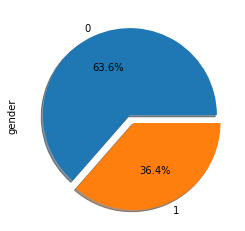

In [26]:
df['gender'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',shadow=True)

In [28]:
df['smoking'].value_counts(normalize=True)

0    0.632712
1    0.367288
Name: smoking, dtype: float64

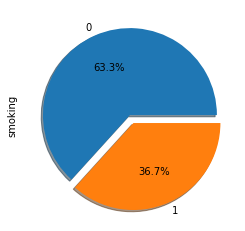

In [29]:
df['smoking'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',shadow=True)

## 상관관계 분석

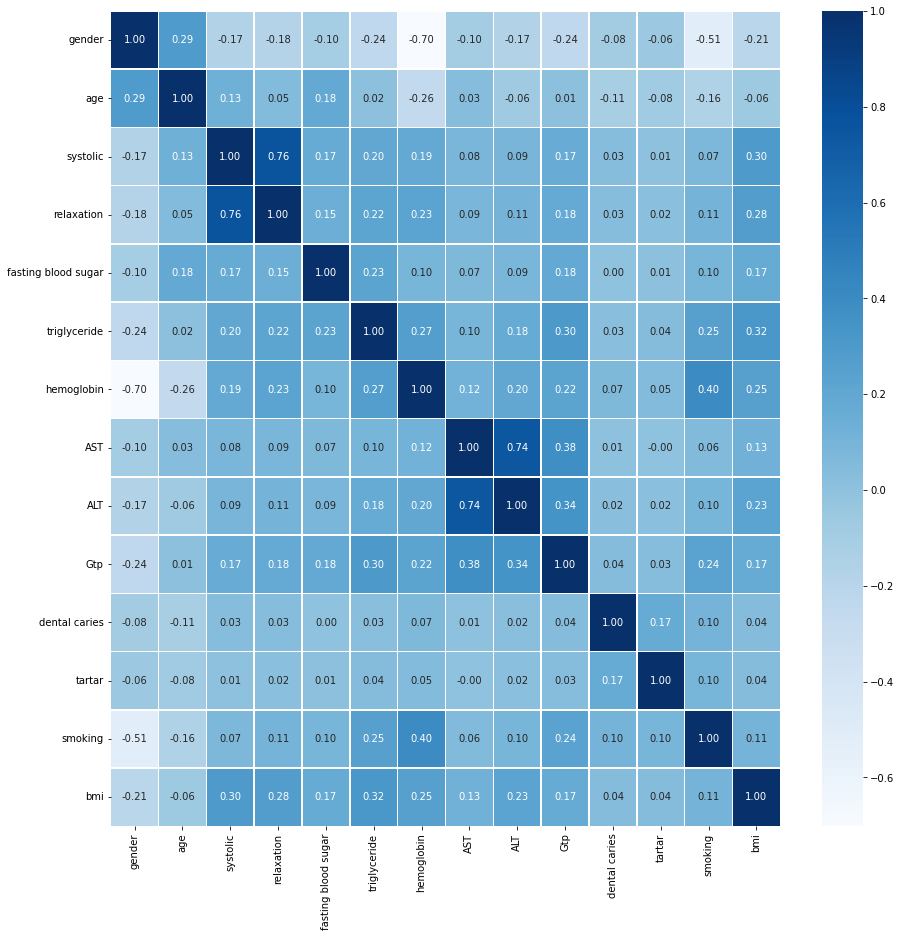

In [17]:
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(15,15))
sns.heatmap(data = df.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')

# 분류문제의 기준모델

## accuracy_score 로 정확도 계산

In [45]:
from sklearn.metrics import accuracy_score

target = df['smoking']

major = target.mode()[0]
predict = [major] * len(target)

accuracy_score = accuracy_score(target, predict)
print('기준모델 정확도 :', accuracy_score)

기준모델 정확도 : 0.6327120591826474


## 데이터 분리


### train, val, test

In [46]:
from sklearn.model_selection import train_test_split

target = 'smoking'

X = df.drop([target], axis = 1)
y = df[target]

# 원본 데이터로 train, test 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# 분리한 train 데이터로 다시 train, val 분리
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=0.8,random_state=42)

In [47]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(35642, 13)
(8911, 13)
(11139, 13)
(35642,)
(8911,)
(11139,)


대부분의 머신러닝 알고리즘은 입력 숫자 특성들의 스케일이 많이 다르면 잘 작동하지 않기때문에, standardScaler 로 표준화 스케일링을 해줌

In [48]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

pipe = make_pipeline(
    StandardScaler(),
    RandomForestClassifier(n_estimators=150)
)

pipe.fit(X_train, y_train)
print('검증 정확도', pipe.score(X_val, y_val))

검증 정확도 0.8151722590057232


#분류 모델의 성능 평가 지표n223

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


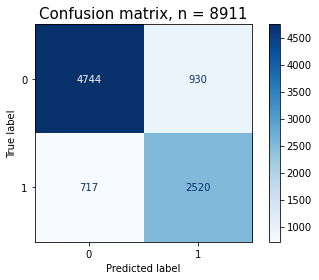

In [49]:
from sklearn.metrics import plot_confusion_matrix

fig, ax = plt.subplots()
pcm = plot_confusion_matrix(pipe, X_val, y_val,
                            cmap=plt.cm.Blues,
                            ax=ax)
plt.title(f'Confusion matrix, n = {len(y_val)}', fontsize=15)
plt.show()

In [50]:
cm = pcm.confusion_matrix
cm

array([[4744,  930],
       [ 717, 2520]])